In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../CF_output/Batch2_1000/constructiveness_and_toxicity_batch2.csv')

In [3]:
df.shape

(1001, 23)

In [4]:
df.columns

Index(['article_id', 'article_author', 'article_published_date',
       'article_title', 'article_url', 'article_text', 'comment_author',
       'comment_counter', 'comment_text', 'agree_constructiveness_expt',
       'agree_toxicity_expt', 'constructive', 'crowd_toxicity_level',
       'has_content', 'crowd_discard', 'constructive_characteristics',
       'non_constructive_characteristics', 'toxicity_characteristics',
       'crowd_comments_constructiveness_expt', 'crowd_comments_toxicity_expt',
       'other_con_chars', 'other_noncon_chars', 'other_toxic_chars'],
      dtype='object')

# Distribution of constructiveness (Check if it's skewed)

In [5]:
# create and save plots
def create_plot(size, labels, colors, title = 'Test', dpi = 300):
    plt.gcf().clear()
    # Create a circle for the center of the plot
    patches, texts, autotexts  = plt.pie(size, labels = labels, autopct='%.1f%%', colors = colors)
    #plt.legend(patches, labels, loc="best")
    p = plt.gcf()
    # Create a circle for the center of the plot
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p.gca().add_artist(my_circle)
    plt.axis('equal')
    plt.title(title)
    plt.draw()
    plt.show()
    #plt.savefig(save_file_name, dpi=dpi)
    #print('Plot saved at the location: ', save_file_name)

In [6]:
def nominalize_constructiveness(constructiveness_score):
    try: 
        if constructiveness_score > 0.6:
            return 'yes'
        elif constructiveness_score < 0.4:
            return 'no'
        else:
            return 'not_sure'
    except:
        print("Error in the input: ", constructiveness_score)
        return np.nan        

In [7]:
df['constructive_nominal'] = df['constructive'].apply(nominalize_constructiveness)

In [8]:
cdict = df['constructive_nominal'].value_counts().to_dict()

[54.0, 30.0, 16.0]


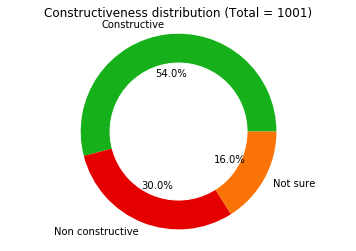

In [9]:
# Plot constructiveness distribution in the data
# The slices will be ordered and plotted counter-clockwise.
labels = 'Constructive', 'Non constructive', 'Not sure'
items =[cdict['yes'], cdict['no'], cdict['not_sure']]
total = sum(cdict.values())
size =[round(item/float(total) * 100) for item in items]
print(size)
colors = ['xkcd:green', 'xkcd:red', 'xkcd:orange']
create_plot(size,labels,colors, 'Constructiveness distribution (Total = '  + str(total) + ')')

# Distribution of toxicity (Check if skewed)

In [10]:
# We consider highest level of toxicity for a comment as the gold toxicity level. 
# The intuition is that for a comment to be toxic, it is enough that at least one coder thinks that it is toxic  
def nominalize_toxicity(toxicity_value):
    try: 
        if toxicity_value > 3:
            return 'Very toxic'
        elif toxicity_value > 2:
            return 'Toxic'
        elif toxicity_value > 1:
            return 'Mildly toxic'
        else:
            return 'Not toxic'
    except:
        print("Error in the input: ", toxicity_value)
        return np.nan        

In [11]:
df['crowd_toxicity_level_nominal'] = df['crowd_toxicity_level'].apply(nominalize_toxicity)

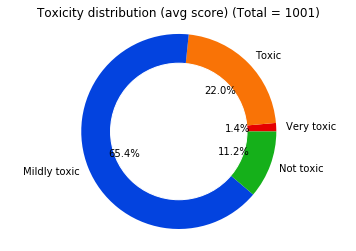

In [12]:
# Plot toxicity distribution with context (avg score)
toxicity_counts_dict = df['crowd_toxicity_level_nominal'].value_counts().to_dict()
total = sum(toxicity_counts_dict.values())
# The slices will be ordered and plotted counter-clockwise.
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[toxicity_counts_dict['Very toxic'],toxicity_counts_dict['Toxic'],toxicity_counts_dict['Mildly toxic'],toxicity_counts_dict['Not toxic']]
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
create_plot(size,labels,colors, 'Toxicity distribution (avg score) (Total = '  + str(total) + ')')

# Distribution of toxicity in constructive and non-constructive comments (Check if the dists are very different)

# Plot toxicity distribution for constructive comments

In [13]:
toxicity_column_name = 'crowd_toxicity_level_nominal'

In [14]:
constructive_very_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Very toxic')].shape[0]
print('Constructive very toxic: ', constructive_very_toxic)
constructive_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Toxic')].shape[0]
print('Constructive toxic: ', constructive_toxic)
constructive_mildly_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Mildly toxic')].shape[0]                               
print('Constructive mildly toxic: ', constructive_mildly_toxic)
constructive_not_toxic = df[(df['constructive_nominal'] == 'yes') & (df[toxicity_column_name] == 'Not toxic')].shape[0]
print('Constructive non toxic: ', constructive_not_toxic)

Constructive very toxic:  2
Constructive toxic:  106
Constructive mildly toxic:  370
Constructive non toxic:  60


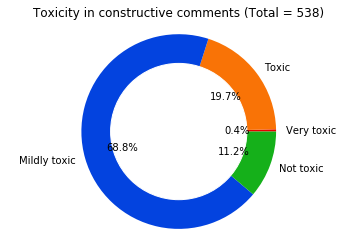

In [15]:
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[constructive_very_toxic, constructive_toxic, constructive_mildly_toxic, constructive_not_toxic]
total = sum(size)
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
create_plot(size,labels,colors, 'Toxicity in constructive comments (Total = '  + str(total) + ')')

# Plot toxicity distribution for non-constructive comments

In [17]:
# Plot toxicity (with context) distribution for non constructive comments
nconstructive_very_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Very toxic')].shape[0]
print('Non constructive very toxic: ', nconstructive_very_toxic)
nconstructive_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Toxic')].shape[0]
print('Non constructive toxic: ', nconstructive_toxic)
nconstructive_mildly_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Mildly toxic')].shape[0]                               
print('Non constructive mildly toxic: ', nconstructive_mildly_toxic)
nconstructive_not_toxic = df[(df['constructive_nominal'] == 'no') & (df[toxicity_column_name] == 'Not toxic')].shape[0]
print('Non constructive non toxic: ', nconstructive_not_toxic)

Non constructive very toxic:  8
Non constructive toxic:  69
Non constructive mildly toxic:  187
Non constructive non toxic:  41


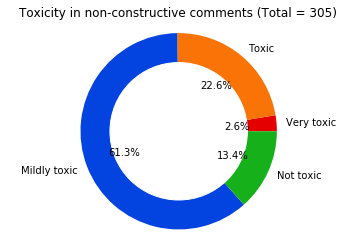

In [18]:
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[nconstructive_very_toxic, nconstructive_toxic, nconstructive_mildly_toxic, nconstructive_not_toxic]
total = sum(size)
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
create_plot(size,labels,colors,'Toxicity in non-constructive comments (Total = '  + str(total) + ')')

# Plot toxicity distribution for ambiguous comments

In [19]:
# Plot toxicity (with context) distribution for ambiguous comments
ns_very_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Very toxic')].shape[0]
print('Ambiguous very toxic: ', ns_very_toxic)
ns_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Toxic')].shape[0]
print('Ambiguous toxic: ', ns_toxic)
ns_mildly_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Mildly toxic')].shape[0]                               
print('Ambiguous mildly toxic: ', ns_mildly_toxic)
ns_not_toxic = df[(df['constructive_nominal'] == 'not_sure') & (df[toxicity_column_name] == 'Not toxic')].shape[0]
print('Ambiguous non toxic: ', ns_not_toxic)

Ambiguous very toxic:  4
Ambiguous toxic:  45
Ambiguous mildly toxic:  98
Ambiguous non toxic:  11


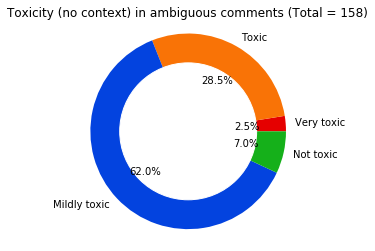

In [20]:
labels = 'Very toxic', 'Toxic', 'Mildly toxic', 'Not toxic'
size=[ns_very_toxic, ns_toxic, ns_mildly_toxic, ns_not_toxic]
total = sum(size)
colors = ['xkcd:red', 'xkcd:orange', 'xkcd:blue', 'xkcd:green']
create_plot(size,labels,colors, 'Toxicity (no context) in ambiguous comments (Total = '  + str(total) + ')')